# ML na prática

- Exemplo para análise de dados sobre cartões de crédito

In [1]:
#import libs

#numericos
import numpy as np
import pandas as pd
#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Salvar os gráficos no notebook
%matplotlib inline

In [3]:
dados = pd.read_csv('examples/AtrasoCartaoCredito.csv',sep=',')

In [4]:
dados.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333


In [5]:
dados.dtypes

ID                       int64
Target                   int64
GrupoEconomico           int64
Sexo                    object
Idade                    int64
GrupoRisco               int64
ValorCompraAnual       float64
GastoMax               float64
GastoMedio             float64
UF                      object
CidadeResidencia        object
RegiaodoPais            object
NumeroComprasOnline    float64
dtype: object

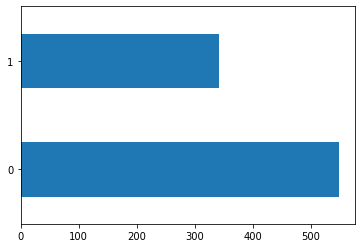

In [9]:
#gráfico Target quem atrasou o cartão em horizontal
dados.Target.value_counts().plot(kind='barh')

In [10]:
# Calcúlo porcentagem
dados.Target.value_counts() / len(dados)

0    0.616162
1    0.383838
Name: Target, dtype: float64

In [11]:
 # quantidade pessoas do sexo que atrasam o cartão
 pd.crosstab(dados['Sexo'], dados['Target'])

Target,0,1
Sexo,,
homem,468,109
mulher,81,233


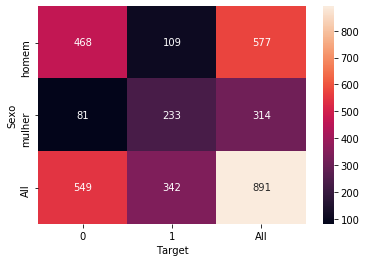

In [13]:
# correlação
ax = sns.heatmap(pd.crosstab(dados['Sexo'],dados['Target'], margins=True), annot=True,fmt='d')

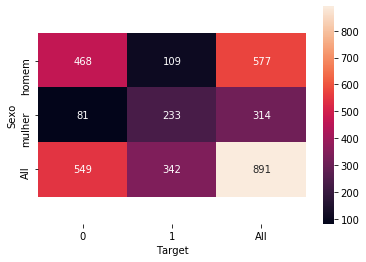

In [14]:
ax = sns.heatmap(pd.crosstab(dados['Sexo'],dados['Target'], margins=True), annot=True,fmt='d')

b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.show()

In [18]:
 dados.corr()

,ID,Target,GrupoEconomico,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
ID,1.000000,-0.005007,-0.035144,-0.000545,-0.057527,0.044534,0.040969,0.040969,0.009751
Target,-0.005007,1.000000,-0.338481,0.042992,-0.035322,0.162551,0.170998,0.170998,0.045050
GrupoEconomico,-0.035144,-0.338481,1.000000,-0.318031,0.083081,-0.263819,-0.270773,-0.270773,-0.045377
Idade,-0.000545,0.042992,-0.318031,1.000000,-0.070370,0.059885,0.064638,0.064638,-0.024469
GrupoRisco,-0.057527,-0.035322,0.083081,-0.070370,1.000000,-0.032142,-0.035291,-0.035291,-0.010241
ValorCompraAnual,0.044534,0.162551,-0.263819,0.059885,-0.032142,1.000000,1.000000,1.000000,0.061008
GastoMax,0.040969,0.170998,-0.270773,0.064638,-0.035291,1.000000,1.000000,1.000000,0.059314
GastoMedio,0.040969,0.170998,-0.270773,0.064638,-0.035291,1.000000,1.000000,1.000000,0.059314
NumeroComprasOnline,0.009751,0.045050,-0.045377,-0.024469,-0.010241,0.061008,0.059314,0.059314,1.000000


In [19]:
dados.describe()

,ID,Target,GrupoEconomico,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
count,891.000000,891.000000,891.000000,891.000000,891.000000,8.630000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,30.402918,0.523008,1.138834e+05,8278.971380,9658.799944,4.879393e+04
std,257.353842,0.486592,0.836071,12.579024,1.102743,3.976690e+05,28684.456627,33465.199399,1.154341e+06
min,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,22.000000,0.000000,1.610000e+02,11.500000,13.416667,1.096117e+00
50%,446.000000,0.000000,3.000000,26.000000,0.000000,2.415000e+03,172.500000,201.250000,1.321429e+01
75%,668.500000,1.000000,3.000000,36.000000,1.000000,7.883350e+04,5628.000000,6566.000000,5.728338e+02
max,891.000000,1.000000,3.000000,92.000000,8.000000,5.123292e+06,365949.428571,426941.000000,3.410762e+07


In [20]:
dados.nunique()

ID                     891
Target                   2
GrupoEconomico           3
Sexo                     2
Idade                   65
GrupoRisco               7
ValorCompraAnual       260
GastoMax               261
GastoMedio             261
UF                      26
CidadeResidencia       851
RegiaodoPais             5
NumeroComprasOnline    704
dtype: int64

In [ ]:
#para dados categóricos:

#carnalidade alta
UF,CidadeResidencia
#carnalidade baixa
Sexo,RegiaodoPais,GrupoEconomico,GrupoRisco

In [21]:
dados.drop(columns=['ID'],axis=1,inplace=True)
dados.columns

Index(['Target', 'GrupoEconomico', 'Sexo', 'Idade', 'GrupoRisco',
       'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia',
       'RegiaodoPais', 'NumeroComprasOnline'],
      dtype='object')

In [23]:
import missingno as msno

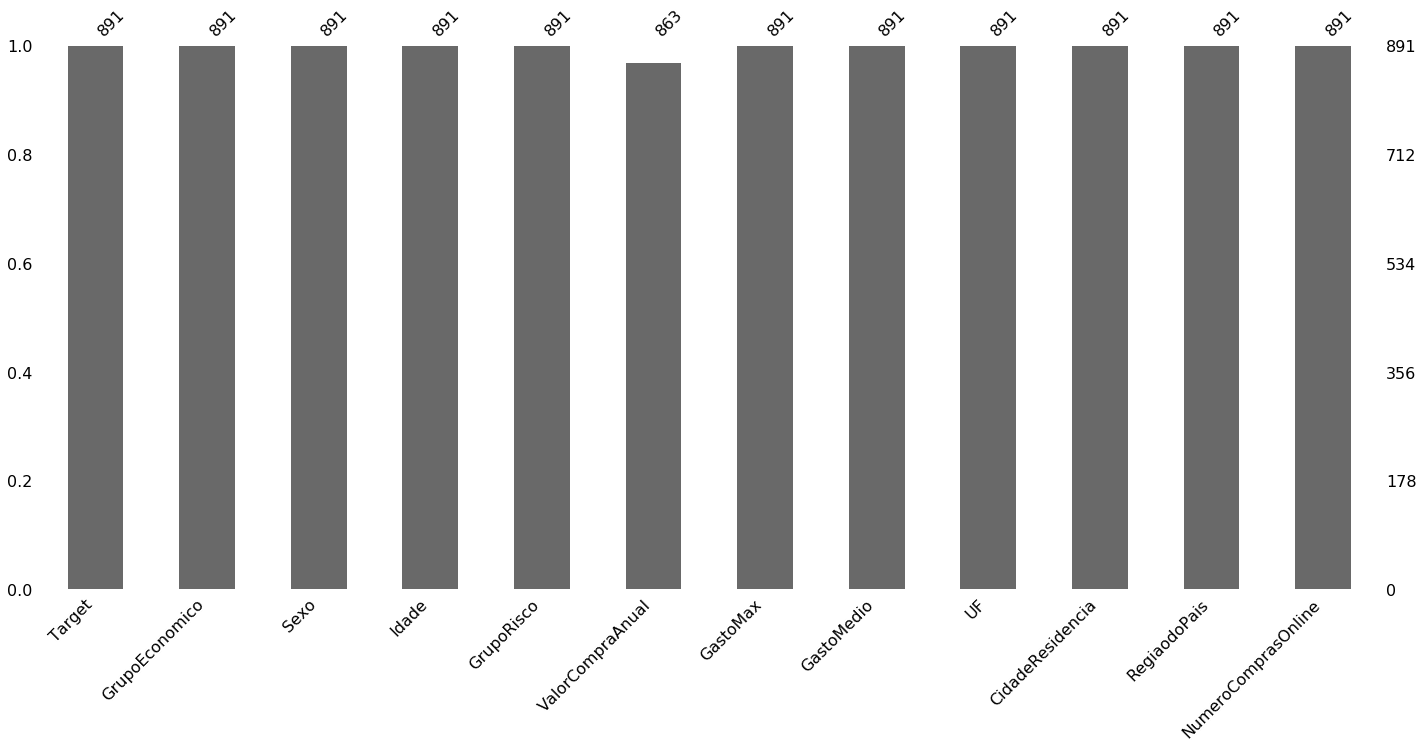

In [24]:
msno.bar(dados)

In [25]:
dados.isnull().sum()

Target                  0
GrupoEconomico          0
Sexo                    0
Idade                   0
GrupoRisco              0
ValorCompraAnual       28
GastoMax                0
GastoMedio              0
UF                      0
CidadeResidencia        0
RegiaodoPais            0
NumeroComprasOnline     0
dtype: int64

In [26]:
#tratamento de NA
dados['ValorCompraAnual'] = dados['ValorCompraAnual'].fillna(dados['ValorCompraAnual'].mean())

In [28]:
dados.isnull().sum()

Target                 0
GrupoEconomico         0
Sexo                   0
Idade                  0
GrupoRisco             0
ValorCompraAnual       0
GastoMax               0
GastoMedio             0
UF                     0
CidadeResidencia       0
RegiaodoPais           0
NumeroComprasOnline    0
dtype: int64

In [30]:
#gerando dummies das variáveis com baixa cardinalidade

dum = pd.get_dummies(dados,columns=["Sexo","RegiaodoPais","GrupoEconomico","GrupoRisco"],drop_first=True,prefix=["Sexo","RegiaodoPais","GrupoEconomico","GrupoRisco"],prefix_sep='_')

dum

,Target,Idade,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,Sexo_mulher,RegiaodoPais_Região Nordeste,...,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul,GrupoEconomico_2,GrupoEconomico_3,GrupoRisco_1,GrupoRisco_2,GrupoRisco_3,GrupoRisco_4,GrupoRisco_5,GrupoRisco_8
0,0,22,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,54.924242,0,0,...,1,0,0,1,1,0,0,0,0,0
1,1,38,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,312.644737,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,26,7925.0,566.071429,660.416667,PR,Agudos do Sul,50.801282,1,0,...,0,1,0,1,0,0,0,0,0,0
3,1,35,531.0,37.928571,44.250000,PR,Congonhinhas,2.528571,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,35,805.0,57.500000,67.083333,BA,Morpará,3.833333,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,13.0,0.928571,1.083333,BA,Marcionílio Souza,0.080247,0,1,...,0,0,1,0,0,0,0,0,0,0
887,1,19,30.0,2.142857,2.500000,BA,Mirante,0.263158,1,1,...,0,0,0,0,0,0,0,0,0,0
888,0,35,2345.0,167.500000,195.416667,RO,Governador Jorge Teixeira,11.166667,1,0,...,0,0,0,1,1,0,0,0,0,0
889,1,26,30.0,2.142857,2.500000,PI,Baixa Grande do Ribeiro,0.192308,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#label encoder

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [33]:
le_uf = le.fit_transform(dum['UF'])
le_uf_df =pd.DataFrame(le_uf, columns=['LE_UF'])

In [35]:
le_cid = le.fit_transform(dum['CidadeResidencia'])
le_cid_df =pd.DataFrame(le_uf, columns=['LE_CidadeResidencia'])

In [36]:
dados_selecionados = pd.merge(dum,le_uf_df,left_index=True,right_index=True)

In [38]:
dados_selecionados = pd.merge(dados_selecionados,le_cid_df,left_index=True,right_index=True)

In [39]:
dados_selecionados.shape

(891, 23)

In [40]:
dados_selecionados= dados_selecionados.drop(columns=['UF','CidadeResidencia'],axis=1)

In [42]:
dados_selecionados.columns

Index(['Target', 'Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio',
       'NumeroComprasOnline', 'Sexo_mulher', 'RegiaodoPais_Região Nordeste',
       'RegiaodoPais_Região Norte', 'RegiaodoPais_Região Sudeste',
       'RegiaodoPais_Região Sul', 'GrupoEconomico_2', 'GrupoEconomico_3',
       'GrupoRisco_1', 'GrupoRisco_2', 'GrupoRisco_3', 'GrupoRisco_4',
       'GrupoRisco_5', 'GrupoRisco_8', 'LE_UF', 'LE_CidadeResidencia'],
      dtype='object')

In [43]:
dados_selecionados.shape

(891, 21)

In [45]:
expl = dados_selecionados.drop(columns=['Target'],axis=1)
target = dados_selecionados['Target']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_teste,y_train,y_teste = train_test_split(expl, target,test_size=3,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
clf_lr = LogisticRegression(random_state=42) 
clf_dt = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier(random_state=42)
clf_gb = GradientBoostingClassifier(random_state=42)

In [63]:
clf_lr.fit(x_train,y_train)
clf_dt.fit(x_train,y_train)
clf_rf.fit(x_train,y_train)
clf_gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
from sklearn.metrics import accuracy_score

In [64]:
print(accuracy_score(y_train,clf_lr.predict(x_train)))
print(accuracy_score(y_teste,clf_lr.predict(x_teste)))

0.6554054054054054
0.6666666666666666


In [65]:
print(accuracy_score(y_train,clf_dt.predict(x_train)))
print(accuracy_score(y_teste,clf_dt.predict(x_teste)))

0.9977477477477478
0.6666666666666666


In [60]:
print(accuracy_score(y_train,clf_rf.predict(x_train)))
print(accuracy_score(y_teste,clf_rf.predict(x_teste)))

0.9977477477477478
0.6666666666666666


In [66]:
print(accuracy_score(y_train,clf_gb.predict(x_train)))
print(accuracy_score(y_teste,clf_gb.predict(x_teste)))

0.884009009009009
0.6666666666666666


In [67]:
import pickle

In [68]:
nome = 'modelo_vencedor.pkl'
pickle.dump(clf_lr,open(nome,'wb'))

In [70]:
modelo_vencedor = pickle.load(open(nome,'rb'))

In [71]:
modelo_vencedor

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_predito_modelo_vencedor = modelo_vencedor.predict(x_teste)
y_predito_modelo_vencedor

array([0, 0, 0])